# Binary Trees
- is either empty, or
- a root node r together with a left binary tree and a right binary tree.

In [1]:
class BinaryTreeNode:
    def __init__(self, data=None, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
    def __repr__(self):
        return f"BinaryTreeNode(data:{self.data})"

### Search Path
For every node, there exists a unique path from root to that node with each node in the sequence being a child of previous node. This sequence is known as Search Path from root to that node.

### Ancestor-Descendant
We say a node is a ancestor of a node d, if it lies in the search path of d and d will be it's descendant.

A node is a ancestor and descendant of itself.

### Depth
depth of a node n is the number of nodes on the search path from root to n, not including n itself.
### Height
height of a binary tree is the maximum depth of any node in the tree.
### Level
all nodes at same depth are called to be at same level.

### Full Binary Tree
binary tree in which every node other than the leaves has two children.<br>
min-nodes: $2^{h} + 1$, for height $h$. <br>
max-nodes: $2^{h+1} - 1$, for height $h$. <br>
height: $\big\lfloor \lg(n) \big\rfloor$ ,for $n$ nodes.

### Perfect Binary Tree
full binary tree in which all leaves are at same depth.<br>
min-height = max-height = $\lg(n+1) - 1$, for $n$ nodes.<br>
number of nodes = $2^{h+1} - 1$ for $h$ height

### Complete Binary Tree
binary tree in which every level, except possibly the last, is completely filled.<br>
min-nodes: $2^{h}$, for height $h$ <br>
max-nodes: $2^{h+1} - 1$ for height $h$ <br>
height: $\big\lfloor \lg(n) \big\rfloor$ ,for $n$ nodes.

### Skewed Binary Tree
**Left-skewed:** A tree in which no node has a right child.<br>
**Right-skewed:** A tree in which no node has a left child.

## Traversal
**Preorder:** root -> left -> right <br>
**Postorder:** left -> right -> root <br>
**Inorder:** left -> root -> right

In [2]:
c = BinaryTreeNode(4)
d = BinaryTreeNode(5)
e = BinaryTreeNode(6)

a = BinaryTreeNode(2, c ,d)
b = BinaryTreeNode(3, e)
root = BinaryTreeNode(1, a, b)

In [3]:
import iplantuml

Writing output for /home/shaker/Documents/Github/AlgoRhythms/EPI/49d20ae8-573f-41b1-b836-d0e511567065.uml to 49d20ae8-573f-41b1-b836-d0e511567065.svg


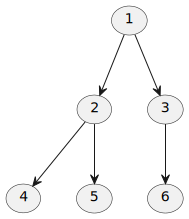

In [4]:
%%plantuml
@startuml
(1) --> (2)
(1) --> (3)
(2) --> (4)
(2) --> (5)
(3) --> (6)
@enduml

In [5]:
def inorder_tree_traversal(root):
    if root:
        inorder_tree_traversal(root.left)
        print(root.data, end=" ")
        inorder_tree_traversal(root.right)
inorder_tree_traversal(root)

4 2 5 1 6 3 

In [6]:
def postorder_tree_traversal(root):
    if root:
        postorder_tree_traversal(root.left)
        postorder_tree_traversal(root.right)
        print(root.data, end=" ")
postorder_tree_traversal(root)

4 5 2 6 3 1 

In [7]:
def preorder_tree_traversal(root):
    if root:
        print(root.data, end=" ")
        preorder_tree_traversal(root.left)
        preorder_tree_traversal(root.right)
preorder_tree_traversal(root)

1 2 4 5 3 6 

In [8]:
def height(root):
    if not root:
        return -1
    ldepth = height(root.left)
    rdepth = height(root.right)
    return max(ldepth, rdepth) + 1
height(root)

2

## Binary Tree from list

In [9]:
def binary_tree(nodes: list) -> BinaryTreeNode:
    if not nodes: return None
    from collections import deque
    queue = deque()
    root = BinaryTreeNode(nodes[0])
    queue.append(root)
    for i in range(len(nodes) // 2):
        node = queue.popleft()
        while not node:
            node = queue.popleft()
            if not queue: return root
        node.left = None if nodes[2*i+1] is None else BinaryTreeNode(nodes[2*i+1])
        node.right = None if nodes[2*i+2] is None else BinaryTreeNode(nodes[2*i+2])
        queue.append(node.left)
        queue.append(node.right)
    return root

## Test If a binary tree is height-balanced

Writing output for /home/shaker/Documents/Github/AlgoRhythms/EPI/ef390746-4154-45c4-8942-8617cf713841.uml to ef390746-4154-45c4-8942-8617cf713841.svg


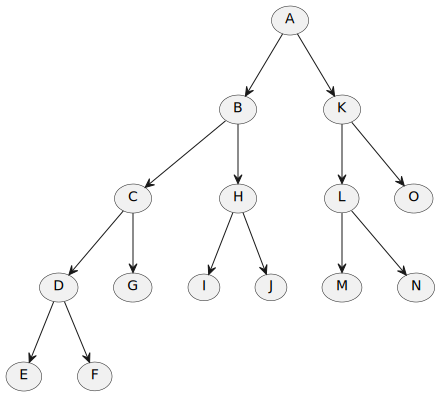

In [10]:
%%plantuml
@startuml
(A) --> (B)
(B) --> (C)
(B) --> (H)
(C) --> (D)
(C) --> (G)
(D) --> (E)
(D) --> (F)
(H) --> (I)
(H) --> (J)
(A) --> (K)
(K) --> (L)
(L) --> (M)
(L) --> (N)
(K) --> (O)
@enduml

In [11]:
def is_height_balanced(root):
    if not root:
        return 1
    l = is_height_balanced(root.left)
    r = is_height_balanced(root.right)
    if not (l and r) or abs(l - r) > 1:
        return False
    else:
        if abs(l - r) < 2:
            return max(l, r) + 1
root = binary_tree(["A", "B", "K", "C", "H", "L", "O", "D", "G", "I", "J", "M", "N", None, None, "E", "F"])
root = binary_tree([3,9,20,None,None,15,7])
root = binary_tree([1,2,2,3,3,None,None,4,4])
bool(is_height_balanced(root))

False

## Book Solution

In [12]:
def is_balanced_tree(root):
    from collections import namedtuple
    BalancedStatusWithHeight = namedtuple('BalancedStatusWithHeight', ('balanced', 'height'))
    def check_balanced(tree):
        if not tree:
            return BalancedStatusWithHeight(True, -1)

        left_result = check_balanced(tree.left)
        if not left_result.balanced:
            return BalancedStatusWithHeight(False, 0)
        
        right_result = check_balanced(tree.right)
        if not right_result.balanced:
            return BalancedStatusWithHeight(False, 0)

        is_balanced = abs(left_result.height - right_result.height) <= 1
        height = max(left_result.height, right_result.height) + 1
        return BalancedStatusWithHeight(is_balanced, height)

    return check_balanced(root).balanced
root = binary_tree([1,2,2,3,3,None,None,4,4])
root = binary_tree([3,9,20,None,None,15,7])
is_balanced_tree(root)

True

## Variants
Q. Write a program that returns the size of the largest subtree that is complete

Q. Define a node in a binary tree to be k-balanced if the difference in the number of nodes in its left and right subtrees is no more than k. Design an algorithm that takes as input a binary tree and positive integer k, and retums a node in the binary tree such that the node is not k-balanced, but all of its descendants are k-balanced. 

# Test if  a binary tree is symmetric

## My Try with Py
In this approach I am checking each level one by one if it is palindromic or not.
I am storing every level in a list and then checking if it is a palimdrome. If this runs all the way then tree is symmetric else not symmetric.

In [13]:
def is_tree_symmetric(root):
    from collections import deque
    queue = deque([root])
    while queue:
        level = []
        while queue:
            node = queue.popleft()
            if node is not None:
                level.extend([node.left, node.right])
        if not all([(level[i].data if level[i] else None) == (level[~i].data if level[~i] else None) for i in range(len(level)//2)]):
            return False
        queue.extend(level)
    return True
root = binary_tree([1,2,2,3,4,4,3])
is_tree_symmetric(root)

True

## Better Approach
We are comparing the left and right of all subtrees and if they are equal then inner function will return true or else false.

In [14]:
def is_tree_symmetric(root):
    def check_symmetric(subtree_0, subtree_1):
        if not subtree_0 and not subtree_1:
            return True
        elif subtree_0 and subtree_1:
            return (
                subtree_0.data == subtree_1.data
                and check_symmetric(subtree_0.left, subtree_1.right)
                and check_symmetric(subtree_0.right, subtree_1.left)
            )
        return False
    return not root or check_symmetric(root.left, root.right)
root = binary_tree([1,2,2,3,4,4,3])
is_tree_symmetric(root)

True

# Compute the lowest common ancestor in a binary tree

In [15]:
preorder_tree_traversal(binary_tree([1,2,3,4,5,6,7,None,None,8,9]))

1 2 4 5 8 9 3 6 7 

In [16]:
def lca(root, p, q):
    #from collections import namedtuple
    #status = namedtuple("status", ("flag", "final", "min_depth", "ca"))
    class status:
        def __init__(self, flag, final, min_depth, ca):
            self.flag = flag
            self.final = final 
            self.min_depth = min_depth
            self.ca = ca
    Status = status(0, None, float("inf"), None)

    def dfs(root, depth=0):
        depth += 1
        if not root: return None
        if root.data == p or root.data == q:
            if not Status.flag:
                Status.min_depth = depth
                Status.flag = 1
            else:
                Status.final = Status.ca

        dfs(root.left, depth)
        if Status.min_depth > depth:
            Status.min_depth = depth
            Status.ca = root
        
        dfs(root.right, depth)
        if Status.min_depth > depth:
            Status.min_depth = depth
            Status.ca = root

    dfs(root)
    return Status.final

root = binary_tree([1,2,3,4,5,6,7,None,None,8,9])
root = binary_tree([3,5,1,6,2,0,8,None,None,7,4])
lca(root,5,1)

BinaryTreeNode(data:3)

In [17]:
def lca(tree, node0, node1):
    from collections import namedtuple
    Status = namedtuple("Status", ("num_nodes", "ancestor"))
    def lca_helper(tree, node0, node1):
        if not tree:
            return Status(0, None)
        left = lca_helper(tree.left, node0, node1)
        if left.num_nodes == 2:
            return left
        right = lca_helper(tree.right, node0, node1)
        if right.num_nodes == 2:
            return right
        num_nodes = (
            left.num_nodes
            + right.num_nodes
            + int(tree is node0)
            + int(tree is node1)
        )
        return Status(num_nodes, tree if num_nodes == 2 else None)
    return lca_helper(tree, node0, node1).ancestor

root = binary_tree([1,2,3,4,5,6,7,None,None,8,9])
root = binary_tree([3,5,1,6,2,0,8,None,None,7,4])
lca(root, root.left.left.left, root.left.right)

# Sum The root-to-leaf paths in a binary tree
Consider a binary tree in which each node contains a binary digit. A root to leaf path can be associated with a binary number - the MSB at root. Find sum of binary numbers represented by all root-to-leaf paths

In [18]:
def root_to_leaf_sum(tree, total=0):
    if not tree:
        return 0
    
    curr_total = total*2 + tree.data
    if not tree.left and not tree.right:
        return curr_total
    
    return (
        root_to_leaf_sum(tree.left, curr_total)
        + root_to_leaf_sum(tree.right, curr_total)
    )

root = binary_tree([1,0,1,0,1,0,0,0,1,None,1,None,0,None,0,None,None,None,None,0,None,1,0,None,None])
root_to_leaf_sum(root)

100

# Root to leaf path with specified sum

In [19]:
def path_root_to_leaf_sum(tree, sm, total=0):
    if not tree:
        return False
    
    curr_total = total*2 + tree.data
    if not tree.left and not tree.right:
        return sm == curr_total
    
    return (
        path_root_to_leaf_sum(tree.left, sm, curr_total)
        or path_root_to_leaf_sum(tree.right, sm, curr_total)
    )

root = binary_tree([1,0,1,0,1,0,0,0,1,None,1,None,0,None,0,None,None,None,None,0,None,1,0,None,None])
path_root_to_leaf_sum(root, 25)

True

# Preorder traversal without recursion

In [20]:
def preorder_traversal(tree):
    stack, res = [tree], []
    while stack:
        curr = stack.pop()
        if curr:
            res.append(curr.data)
            stack += [curr.right, curr.left]
    return res
tree = binary_tree(["A","B","C","D","E","F",None,None,"I"])
preorder_traversal(tree)

['A', 'B', 'D', 'I', 'E', 'C', 'F']

# Inorder Traversal without recursion

In [21]:
def inorder_traversal(tree):
    def goto_left(tree, stack):
        while tree:
            stack.append(tree)
            tree = tree.left
        return tree
    stack = []
    goto_left(tree, stack)
    res = []
    while stack:
        node = stack.pop()
        res.append(node)
        if node.right: 
            node = node.right
            goto_left(node, stack)
    return res
tree = binary_tree(["A","B","D","E","F"])
inorder_traversal(tree)

[BinaryTreeNode(data:E),
 BinaryTreeNode(data:B),
 BinaryTreeNode(data:F),
 BinaryTreeNode(data:A),
 BinaryTreeNode(data:D)]

In [22]:
#cleaner version
def inorder_traversal(tree):
    stack, result = [], []
    while stack or tree:
        if tree:
            stack.append(tree)
            tree = tree.left
        else:
            tree = stack.pop()
            result.append(tree)
            tree = tree.right
    return result
inorder_traversal(tree)

[BinaryTreeNode(data:E),
 BinaryTreeNode(data:B),
 BinaryTreeNode(data:F),
 BinaryTreeNode(data:A),
 BinaryTreeNode(data:D)]

# PostOrder Traversal without recursion

In [23]:
def postorder_without_recursion(tree):
    stack, result = [tree], []

# kth node in inorder traversal

In [24]:
def kth_node_inorder(tree, k):
    """We can basically use this as BST if we have information about how many nodes are to the left stored in our node as `size`"""
    while tree:
        curr = tree.left.size + 1
        if curr > k:
            tree = tree.left
        elif curr < k:
            tree = tree.right
        else:
            return tree
    return None

# Compute the successor

In [25]:
def successor(node):
    if node.right:
        node = node.right
        while node.left:
            node = node.left
        return node
    while node.parent and node is node.parent.right:
        node = node.parent
    return node.parent
tree = binary_tree([5,2,7,1,4,6,8,None,None,3,None])
print(f"successor of {tree.left} is {successor(tree.left)}")

successor of BinaryTreeNode(data:2) is BinaryTreeNode(data:3)


# Inorder Traversal with O(1) Space (using parent field)

In [26]:
def inorder_traversal(tree):
    """using successor method"""
    result = []
    while tree.left:
        tree = tree.left
    while tree:
        result.append(tree)
        tree = successor(tree)
    return result

In [27]:
def inorder_traversal(tree):
    """just writing successor method instead of calling it."""
    result = []
    while tree.left:
        tree = tree.left
    while tree:
        result.append(tree)
        if tree.right:
            while tree.left:
                tree = tree.left
        else:
            while tree.parent and tree.parent.right:
                tree = tree.parent
            tree = tree.parent

We need to know when we return to a parent if the just completed subtree was the parent's left child (in which case we need to visit the parent and then traverse its right subtree) or right subtree (in which case we have completed traversing the parent). 

We can achieve this by recording the subtree's root before we move to the parent. We can then compare the subtree's root before we move to the parent.

We are maintaing three pointers prev, curr(tree) and next.

In [28]:
def inorder_traversal_o1_space(tree):
    prev, res = None, []
    while tree:
        if prev is tree.parent: # we are going down
            if tree.left: # going towards leftmost node
                nxt = tree.left
            else: # when no more left nodes go to right
                result.append(tree)
                # go to right if right is present otherwise go to parent.
                nxt = tree.right or tree.parent
        if prev is tree.left:
            result.append(tree)
            nxt = tree.right
        if prev is tree.right:
            nxt = tree.parent
        prev, tree = tree, nxt
    return result

### Follow ups
* Perform the same for preorder and postorder traversal.

# Reconstruct Binary Tree from inorder travesal data


Writing output for /home/shaker/Documents/Github/AlgoRhythms/EPI/3bf8e68c-c4dc-4566-987d-95ff3778a18a.uml to 3bf8e68c-c4dc-4566-987d-95ff3778a18a.svg


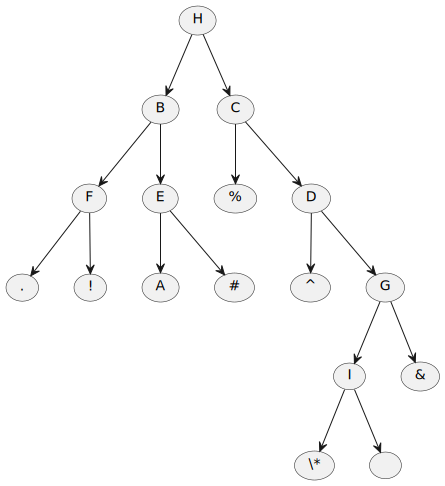

In [29]:
%%plantuml
@startuml
(H) --> (B)
(H) --> (C)
(B) --> (F)
(B) --> (E)
(F) --> (.)
(F) --> (!)
(E) --> (A)
(E) --> (#)
(C) --> (%)
(C) --> (D)
(D) --> (^)
(D) --> (G)
(G) --> (I)
(G) --> (&)
(I) --> (\*)
(I) --> ( )
@enduml

In [30]:
def binary_tree_from_traversal(preorder, inorder):
    if not inorder:
        return None
    root = BinaryTreeNode(preorder[0])
    
    # here we are lagging. We can store associate index with data using hashmap.
    # and we can get O(1)
    cindex = inorder.index(preorder[0])
    
    nxt_inorder = inorder[:cindex]
    nxt_preorder = preorder[1:len(nxt_inorder)+1]
    root.left = binary_tree_from_traversal(nxt_preorder, nxt_inorder)
    
    nxt_preorder = preorder[len(nxt_inorder)+1:]
    nxt_inorder = inorder[cindex+1:]
    root.right = binary_tree_from_traversal(nxt_preorder, nxt_inorder)
    
    return root
preorder = ["H","B","F","E","A","C","D","G","I"]
inorder = ["F","B","A","E","H","C","D","I","G"]
tree = binary_tree_from_traversal(preorder, inorder)

In [31]:
def binary_tree_from_traversal(preorder, inorder):
    inorder_idx = {data:i for i, data in enumerate(inorder)}
    def helper(preorder, inorder):
        if not inorder:
            return None
        root = BinaryTreeNode(preorder[0])
        
        # here we are lagging. We can store associate index with data using hashmap.
        # and we can get O(1)
        cindex = inorder_idx[preorder[0]]
        
        # we are copying lists here which will take more space.
        # we could improve this by using indexes
        nxt_inorder = inorder[:cindex]
        nxt_preorder = preorder[1:len(nxt_inorder)+1]
        root.left = binary_tree_from_traversal(nxt_preorder, nxt_inorder)
        
        nxt_preorder = preorder[len(nxt_inorder)+1:]
        nxt_inorder = inorder[cindex+1:]
        root.right = binary_tree_from_traversal(nxt_preorder, nxt_inorder)
    
        return root
    return helper(preorder, inorder)
preorder = ["H","B","F","E","A","C","D","G","I"]
inorder = ["F","B","A","E","H","C","D","I","G"]
tree = binary_tree_from_traversal(preorder, inorder)

In [32]:
def binary_tree_from_traversal(preorder, inorder):
    inorder_idx = {data:i for i, data in enumerate(inorder)}
    def helper(l, r, c=0):
        if l > r:
            return None
        root = BinaryTreeNode(preorder[c])
        c_index = inorder_idx[preorder[c]]
        root.left = helper(l, c_index-1, c+1)
        root.right = helper(c_index+1, r, c+c_index-l+1)
        return root
    return helper(0, len(inorder)-1)
root = binary_tree_from_traversal(preorder, inorder)

### Variant
* solve same problem for inorder and postorder traversal
* Let A be an array of n distinct integers. Let the index of the maximum element of A be m. Define the max-tree on A to be the binary tree on the entires of A in which the root contains the maximum element of A, the left child is the max tree on A\[0,m-1\] and the right child is the max-tree on A\[m+1,n-1\]. Desing and O(n) algorithm for building the max tree of A.

# Reconstruct a binary tree from a preorder traversal with markers

In [33]:
def binary_tree_from_traversal_with_markers(preorder):
    def helper(c=0):
        if not preorder[c]:
            return None, c
        root = BinaryTreeNode(preorder[c])
        root.left, c = helper(c+1)
        root.right, c = helper(c+1)
        return root, c
    return helper()[0]
preorder = ["H","B","F",None,None,"E","A",None,None,None,"C",None,"D",None,"G","I",None,None,None]
root = binary_tree_from_traversal_with_markers(preorder)
root.left.left

BinaryTreeNode(data:F)

In [34]:
def binary_tree_from_traversal_with_markers(preorder):
    def helper(preorder_iter):
        val = next(preorder_iter)
        if not val:
            return None
        return BinaryTreeNode(val, helper(preorder_iter), helper(preorder_iter))
    return helper(iter(preorder))
root = binary_tree_from_traversal_with_markers(preorder)
root.left.left

BinaryTreeNode(data:F)

# Form a linked list from the leaves of the binary tree
Given a binary tree, compute a linked list from the leaves of the binary tree. The leaves should appear in left to right order.

In [35]:
class ListNode:
    def __init__(self, data=0, next_node=None):
        self.data = data
        self.next = next_node
    def __repr__(self):
        return f"ListNode(data={self.data})"

def search_list(L, key):
    while L and L.data != key:
        L = L.next
    return L # returns null if key not present

def insert_after(node, new_node):
    new_node.next = node.next
    node.next = new_node

# Assuming node is not a tail
def delete_after(node):
    node.next = node.next.next

def print_list(node):
    curr = node
    while curr:
        print(curr.data, end=' > ')
        curr = curr.next
    print('(X)')

In [36]:
def leave_linked_list(tree):
    node = ListNode()
    def dfs(root, node):
        if not root:
            return node
        if not root.left and not root.right:
            node.next = ListNode(root.data)
            return node.next
        node = dfs(root.left, node)
        node = dfs(root.right, node)
        return node
    dfs(tree, node)
    return node.next
tree = binary_tree(["A","B","K","C","H","L","O","D","G","I","J","M","N",None,None,"E","F"])
node = leave_linked_list(tree)
print_list(node)

E > F > G > I > J > M > N > O > (X)


In [37]:
def leave_list(tree):
    if not tree:
        return []
    if not tree.left and not tree.right:
        return [tree]
    return leave_list(tree.left) + leave_list(tree.right)
print(leave_list(tree))

[BinaryTreeNode(data:E), BinaryTreeNode(data:F), BinaryTreeNode(data:G), BinaryTreeNode(data:I), BinaryTreeNode(data:J), BinaryTreeNode(data:M), BinaryTreeNode(data:N), BinaryTreeNode(data:O)]


# Compute the exterior of the Binary Tree
exterior of binary tree = the nodes from root to leftmost leaf, followed by leaves in left to right order, followed by nodes from the rightmost leaf to the root.

In [38]:
def binary_tree_exterior(tree):
    def left_part(tree):
        if not tree or not(tree.left or tree.right):
            return []
        return [tree] + left_part(tree.left or tree.right)
    def right_part(tree):
        if not tree or not(tree.left or tree.right):
            return []
        return right_part(tree.right or tree.left) + [tree]
    def leaves(tree):
        if not tree:
            return []
        if not tree.left and not tree.right:
            return [tree]
        return leaves(tree.left) + leaves(tree.right)
    return left_part(tree) + leaves(tree) + right_part(tree)
binary_tree_exterior(tree)

[BinaryTreeNode(data:A),
 BinaryTreeNode(data:B),
 BinaryTreeNode(data:C),
 BinaryTreeNode(data:D),
 BinaryTreeNode(data:E),
 BinaryTreeNode(data:F),
 BinaryTreeNode(data:G),
 BinaryTreeNode(data:I),
 BinaryTreeNode(data:J),
 BinaryTreeNode(data:M),
 BinaryTreeNode(data:N),
 BinaryTreeNode(data:O),
 BinaryTreeNode(data:K),
 BinaryTreeNode(data:A)]

In [46]:
def binary_tree_exterior(tree):
    def is_leaf(node):
        return not node.left and not node.right
    def left_boundary_and_leaves(subtree, is_boundary):
        if not subtree:
            return []
        return (
            ([subtree] if is_boundary or is_leaf(subtree) else [])
            + left_boundary_and_leaves(subtree.left, is_boundary)
            + left_boundary_and_leaves(subtree.right, is_boundary and not subtree.left)
        )
    def right_boundary_and_leaves(subtree, is_boundary):
        if not subtree:
            return []
        return (
            right_boundary_and_leaves(subtree.right, is_boundary)
            + right_boundary_and_leaves(subtree.left, is_boundary and not subtree.right)
            + ([subtree] if is_boundary or is_leaf(subtree) else [])
        )
    return (
        [tree]
        + left_boundary_and_leaves(tree.left, is_boundary=True)
        + right_boundary_and_leaves(tree.right, is_boundary=True)
        if tree else []
    )
binary_tree_exterior(tree)

[BinaryTreeNode(data:A),
 BinaryTreeNode(data:B),
 BinaryTreeNode(data:C),
 BinaryTreeNode(data:D),
 BinaryTreeNode(data:E),
 BinaryTreeNode(data:F),
 BinaryTreeNode(data:G),
 BinaryTreeNode(data:I),
 BinaryTreeNode(data:J),
 BinaryTreeNode(data:O),
 BinaryTreeNode(data:N),
 BinaryTreeNode(data:M),
 BinaryTreeNode(data:K)]